In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-ballon-dor-list/Ballon Dor Nominees.xlsx


# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/kaggle/input/data-ballon-dor-list/Ballon Dor Nominees.xlsx")
df

,Year,Order,Player,Club,Nationality,Points,Position,League,Player.1,Club.1
0,1956,1,Stanley Matthews,Blackpool,England,47.0,FW,English Football League Championship,Stanley Matthews,Blackpool Football Club
1,1956,2,Alfredo Di StÃ©fano,Real Madrid,Spain,44.0,FW,La Liga,Alfredo Di Stéfano,Real Madrid
2,1956,3,Raymond Kopa,Reims / Â Real Madrid,France,33.0,MF,La Liga,Raymond Kopa,Real Madrid
3,1956,4,Ferenc PuskÃ¡s,Budapest HonvÃ©d,Hungary,32.0,FW,Hungarian National Championship,Ferenc Puskás,Budapest Honvéd
4,1956,5,Lev Yashin,Dynamo Moscow,Soviet Union,19.0,GK,Russian Premier League,Lev Yashin,Dynamo Moscow
...,...,...,...,...,...,...,...,...,...,...
1949,2023,26,Jamal Musiala,Bayern Munich,Germany,0.0,MF,Bundesliga,Jamal Musiala,Bayern Munich Football Club
1950,2023,26,Nicolo Barella,Inter Milan,Italy,0.0,MF,Serie A,Nicolo Barella,Inter Milan
1951,2023,26,Randal Kolo Muani,Eintracht Frankfurt / PSG,France,0.0,FW,Ligue 1,Randal Kolo Muani,Eintracht Frankfurt
1952,2023,26,Martin Odegaard,Arsenal,Norway,0.0,MF,English Premier League,Martin Odegaard,Arsenal Football Club


It seems there are duplicate columns with slight variations of the name of the player and their respective football club.
This may be done due to the difference in text format with one using UTF-8 and the other using a more standard format.

In [4]:
#dropping unnecessary columns
df.drop(columns=['Player', 'Club'], inplace= True)

#renaming duplicate columns
df.rename(columns={'Player.1': 'Player', 'Club.1' : 'Club'}, inplace=True)

df

,Year,Order,Nationality,Points,Position,League,Player,Club
0,1956,1,England,47.0,FW,English Football League Championship,Stanley Matthews,Blackpool Football Club
1,1956,2,Spain,44.0,FW,La Liga,Alfredo Di Stéfano,Real Madrid
2,1956,3,France,33.0,MF,La Liga,Raymond Kopa,Real Madrid
3,1956,4,Hungary,32.0,FW,Hungarian National Championship,Ferenc Puskás,Budapest Honvéd
4,1956,5,Soviet Union,19.0,GK,Russian Premier League,Lev Yashin,Dynamo Moscow
...,...,...,...,...,...,...,...,...
1949,2023,26,Germany,0.0,MF,Bundesliga,Jamal Musiala,Bayern Munich Football Club
1950,2023,26,Italy,0.0,MF,Serie A,Nicolo Barella,Inter Milan
1951,2023,26,France,0.0,FW,Ligue 1,Randal Kolo Muani,Eintracht Frankfurt
1952,2023,26,Norway,0.0,MF,English Premier League,Martin Odegaard,Arsenal Football Club


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1954 non-null   int64  
 1   Order        1954 non-null   int64  
 2   Nationality  1954 non-null   object 
 3   Points       1953 non-null   float64
 4   Position     1954 non-null   object 
 5   League       1954 non-null   object 
 6   Player       1954 non-null   object 
 7   Club         1954 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 122.2+ KB


There is a missing value in the "Points" column.

In [6]:
df.loc[df['Points'].isna()]

,Year,Order,Nationality,Points,Position,League,Player,Club
422,1970,24,Spain,NaN,FW,La Liga,Carles Rexach,Futbol Club Barcelona


In [7]:
#Manually udpating the entry because only 1 missing value. 
df['Points'] = df['Points'].fillna(1)

#/tmp/ipykernel_33/647600596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Points'].fillna(value= 1, inplace= True)

In [8]:
df.isna().sum()

Year           0
Order          0
Nationality    0
Points         0
Position       0
League         0
Player         0
Club           0
dtype: int64

No more null values.

In [9]:
df.describe()

,Year,Order,Points
count,1954.000000,1954.000000,1954.000000
mean,1989.250256,14.501535,22.774302
std,19.083193,8.314926,66.134815
min,1956.000000,1.000000,0.000000
25%,1973.000000,8.000000,2.000000
50%,1989.000000,14.000000,4.000000
75%,2005.000000,21.000000,15.000000
max,2023.000000,36.000000,946.000000


In [10]:
df.nunique()

Year            67
Order           33
Nationality     80
Points         285
Position         5
League          55
Player         807
Club           228
dtype: int64

In [11]:
print(df["Position"].unique())

['FW' 'MF' 'GK' 'DF' 'Unknown']


There appears to be gaps in the data where one entry has an unidentified position.

In [12]:
# Update 'Position' to 'GK' where the current 'Position' is 'Unknown'

df.loc[df['Position'] == 'Unknown', 'Position'] = 'GK'

In [13]:
df.loc[57]

Year                             1958
Order                              11
Nationality                   England
Points                            5.0
Position                           GK
League         English Premier League
Player                 Colin McDonald
Club            Burnley Football Club
Name: 57, dtype: object

In [14]:
df.sort_values(by= 'Points', ascending= False).head(20)

,Year,Order,Nationality,Points,Position,League,Player,Club
1774,2017,1,Portugal,946.0,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol
1804,2018,1,Croatia,753.0,MF,La Liga,Luka Modrić,Real Madrid Club de Fútbol
1744,2016,1,Portugal,745.0,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol
1834,2019,1,ArgentinaÂ,686.0,FW,La Liga,Lionel Messi,Futbol Club Barcelona
1835,2019,2,NetherlandsÂ,679.0,DF,English Premier League,Virgil van Dijk,Liverpool Football Club
1775,2017,2,Argentina,670.0,FW,La Liga,Lionel Messi,Futbol Club Barcelona
1864,2021,1,Argentina,613.0,FW,Ligue 1,Lionel Messi,Paris Saint-Germain
1865,2021,2,Poland,580.0,FW,Bundesliga,Robert Lewandowski,Bayern Munich Football Club
1894,2022,1,France,549.0,FW,La Liga,Karim Benzema,Real Madrid Club de Fútbol
1805,2018,2,Portugal,478.0,FW,La Liga,Cristiano Ronaldo,Real Madrid


we can see that most of the players are from the Spanish League (La Liga). Additionally, We can see that the top 20 players with the most points are in the FW position, however, analyzing the distribution of awards in relation to position of the player will be skewed due to these outliers. 

It can also be said that the players with the highest points are all current players suggesting that there has either been a different format in the scoring in earlier iterations or that the quality of the players are less balanced when compared to older generations. 

In [15]:
winners = df.query("Order == 1")

In [16]:
winners.sort_values(by= "Year", ascending = False).head(30)

,Year,Order,Nationality,Points,Position,League,Player,Club
1924,2023,1,Argentina,462.00,FW,Ligue 1,Lionel Messi,Paris Saint-Germain
1894,2022,1,France,549.00,FW,La Liga,Karim Benzema,Real Madrid Club de Fútbol
1864,2021,1,Argentina,613.00,FW,Ligue 1,Lionel Messi,Paris Saint-Germain
1834,2019,1,ArgentinaÂ,686.00,FW,La Liga,Lionel Messi,Futbol Club Barcelona
1804,2018,1,Croatia,753.00,MF,La Liga,Luka Modrić,Real Madrid Club de Fútbol
1774,2017,1,Portugal,946.00,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol
1744,2016,1,Portugal,745.00,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol
1721,2015,1,Argentina,41.33,FW,La Liga,Lionel Messi,Futbol Club Barcelona
1698,2014,1,Portugal,37.66,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol
1675,2013,1,Portugal,27.99,FW,La Liga,Cristiano Ronaldo,Real Madrid Club de Fútbol


I've decided to compare the short-list between 2010 and 2009 to explore whether there was greater distribution of points among the players in which the winner had less points. It appears the short-list is of the same size suggesting that every few years there is a major change in methodologt and format of the Ballon D'Or.

# Correlation

Next, I want to find the correlation between the columns. 

<Axes: >

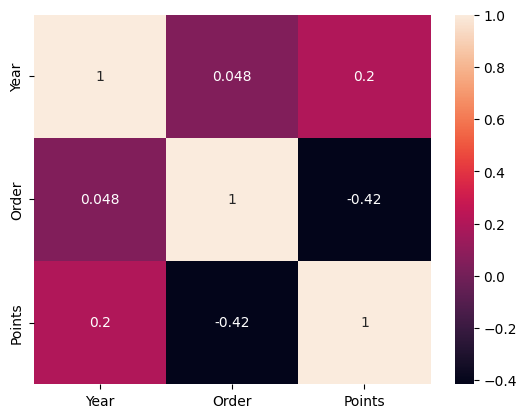

In [17]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only= True), annot= True)

The heatmap shows that the columns are generally unrelated to one another. However, the 'Order' and 'Points' columns appear to have a moderately negative correlation. This is because the more poinst a player has, the higher their rankings in the polls.  

Next, I want to find the correlation between the 'Points' and 'Position' columns.

In [18]:
#creating dummy columns
pd.get_dummies(df.Position)

posCorr = df.drop(columns=['Year', 'Order', 'Nationality', 'League',
       'Player', 'Club'])

position_dummies = pd.get_dummies(posCorr.Position)

merged_posCorr = pd.concat([posCorr, position_dummies], axis = 'columns')

merged_posCorr.drop(columns= ['Position'], inplace= True)

merged_posCorr

,Points,DF,FW,GK,MF
0,47.0,False,True,False,False
1,44.0,False,True,False,False
2,33.0,False,False,False,True
3,32.0,False,True,False,False
4,19.0,False,False,True,False
...,...,...,...,...,...
1949,0.0,False,False,False,True
1950,0.0,False,False,False,True
1951,0.0,False,True,False,False
1952,0.0,False,False,False,True


<Axes: >

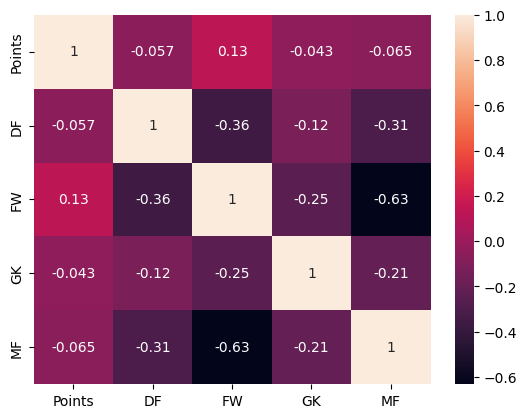

In [19]:
sns.heatmap(merged_posCorr.corr(), annot= True)

Although it shows that the points columns is unrelated to the player's position, the positive relation with the FW position shows that they are likely to score higher than the other positions, and win the ballon d'or.

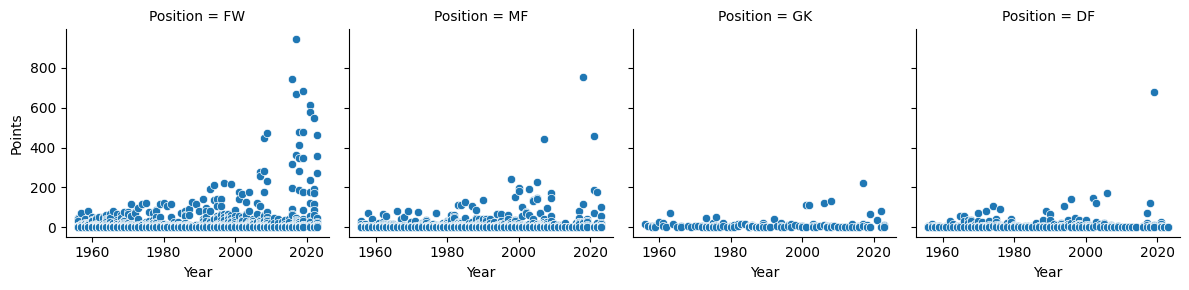

In [20]:
g= sns.FacetGrid(df, col= 'Position')
g.map(sns.scatterplot, 'Year', 'Points')

The positive relationship between points and FW position is further supported by this scatterplot which shows how many points players of each position scored throughout the years.
We can see that FWs tend to score higher and in higher volume. 

In [21]:
print(df['Position'].value_counts(), df['Club'].value_counts().head(20), df['Nationality'].value_counts().head(20))

Position
FW    831
MF    685
DF    290
GK    148
Name: count, dtype: int64 Club
Real Madrid Club de Fútbol         145
Futbol Club Barcelona              118
Juventus Football Club             105
Bayern Munich Football Club        104
AC Milan                            89
Manchester United Football Club     82
Internazionale                      65
Liverpool Football Club             57
Chelsea Football Club               38
AFC Ajax                            37
Manchester City Football Club       34
Arsenal Football Club               33
Paris Saint-Germain                 32
Sport Lisboa e Benfica              28
Tottenham Hotspur Football Club     28
Club Atlético Madrid                26
Real Madrid                         23
Borussia Dortmund                   22
Red Star Belgrade                   22
Fiorentina                          22
Name: count, dtype: int64 Nationality
Italy             184
France            165
England           155
Spain             140
West Germany  

In [22]:
dfDescription= df.groupby('Position').describe()
dfDescription.reset_index(inplace=True)
dfDescription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Position, )     4 non-null      object 
 1   (Year, count)    4 non-null      float64
 2   (Year, mean)     4 non-null      float64
 3   (Year, std)      4 non-null      float64
 4   (Year, min)      4 non-null      float64
 5   (Year, 25%)      4 non-null      float64
 6   (Year, 50%)      4 non-null      float64
 7   (Year, 75%)      4 non-null      float64
 8   (Year, max)      4 non-null      float64
 9   (Order, count)   4 non-null      float64
 10  (Order, mean)    4 non-null      float64
 11  (Order, std)     4 non-null      float64
 12  (Order, min)     4 non-null      float64
 13  (Order, 25%)     4 non-null      float64
 14  (Order, 50%)     4 non-null      float64
 15  (Order, 75%)     4 non-null      float64
 16  (Order, max)     4 non-null      float64
 17  (Points, count)  4 n

In [23]:
# Flatten the column index
dfDescription.columns = [' '.join(col).strip() for col in dfDescription.columns.values]

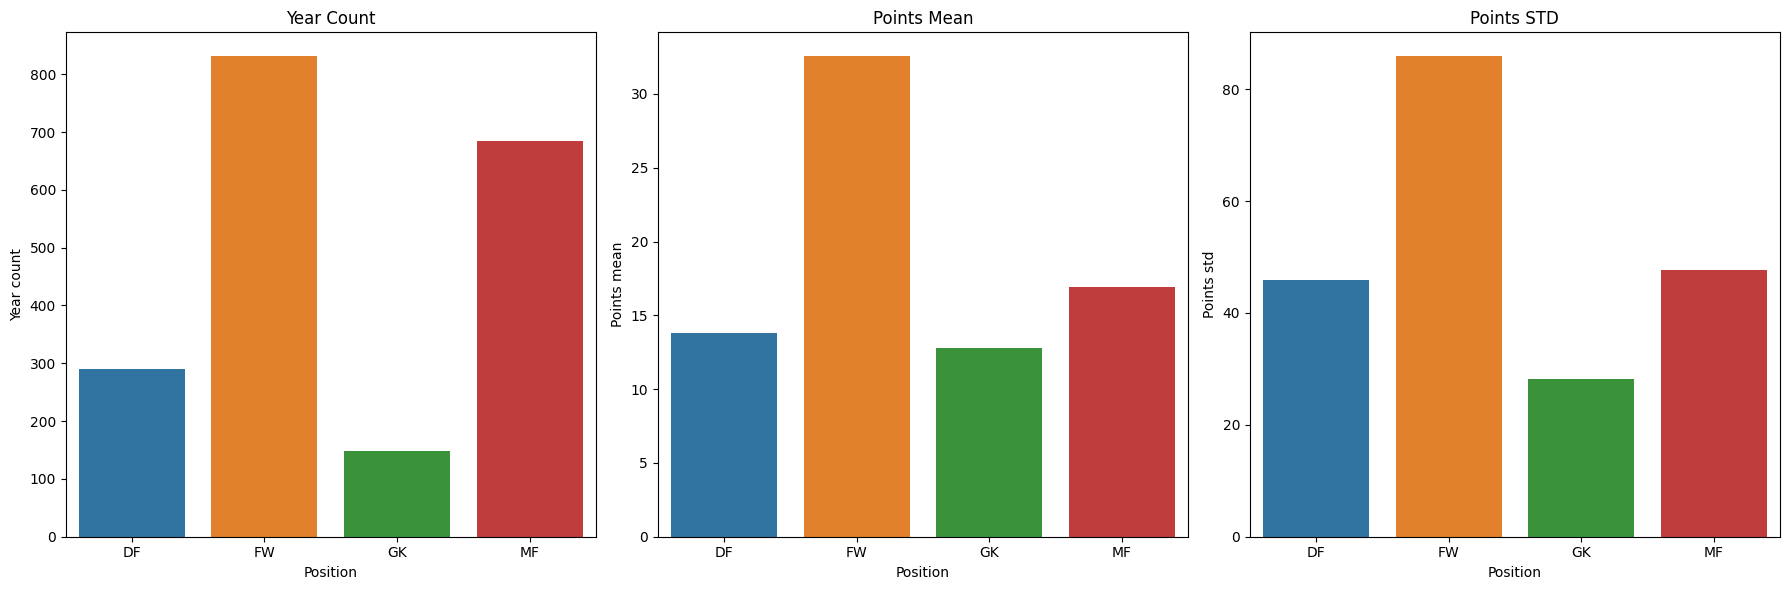

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False) # Adjust the figsize as needed

# Barplot for 'Year count'
sns.barplot(x='Position', y='Year count', data=dfDescription, ax=axes[0])
axes[0].set_title('Year Count')

# Barplot for 'Points mean'
sns.barplot(x='Position', y='Points mean', data=dfDescription, ax=axes[1])
axes[1].set_title('Points Mean')

# Barplot for 'Points std'
sns.barplot(x='Position', y='Points std', data=dfDescription, ax=axes[2])
axes[2].set_title('Points STD')

# Display the plots
plt.tight_layout()
plt.show()


In [25]:
df.to_csv("Ballon D'Or Cleaned.csv")